Training with SIGMOID + GD + LR: 0.1...
SIGMOID + GD => Acc: 0.61, Final Loss: 4.6311
Training with SIGMOID + SGD + LR: 0.01...
SIGMOID + SGD => Acc: 0.88, Final Loss: 0.2064
Training with SIGMOID + MINI-BATCH + LR: 0.01...
SIGMOID + MINI-BATCH => Acc: 0.94, Final Loss: 0.1557
Training with RELU + GD + LR: 0.1...
RELU + GD => Acc: 0.61, Final Loss: 74.8143
Training with RELU + SGD + LR: 0.01...


C:\Users\Syed\AppData\Local\Temp\ipykernel_8892\2693022099.py:114: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))
C:\Users\Syed\AppData\Local\Temp\ipykernel_8892\2693022099.py:114: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))


RELU + SGD => Acc: 0.61, Final Loss: 23.5509
Training with RELU + MINI-BATCH + LR: 0.01...
RELU + MINI-BATCH => Acc: 0.93, Final Loss: 0.1445
Training with TANH + GD + LR: 0.1...
TANH + GD => Acc: 0.39, Final Loss: 12.1099
Training with TANH + SGD + LR: 0.01...
TANH + SGD => Acc: 0.87, Final Loss: 0.2307
Training with TANH + MINI-BATCH + LR: 0.01...
TANH + MINI-BATCH => Acc: 0.98, Final Loss: 0.0913
Training with SOFTMAX + GD + LR: 0.1...
SOFTMAX + GD => Acc: 0.61, Final Loss: 3.3745
Training with SOFTMAX + SGD + LR: 0.01...
SOFTMAX + SGD => Acc: 0.89, Final Loss: 0.2377
Training with SOFTMAX + MINI-BATCH + LR: 0.01...
SOFTMAX + MINI-BATCH => Acc: 0.94, Final Loss: 0.1637


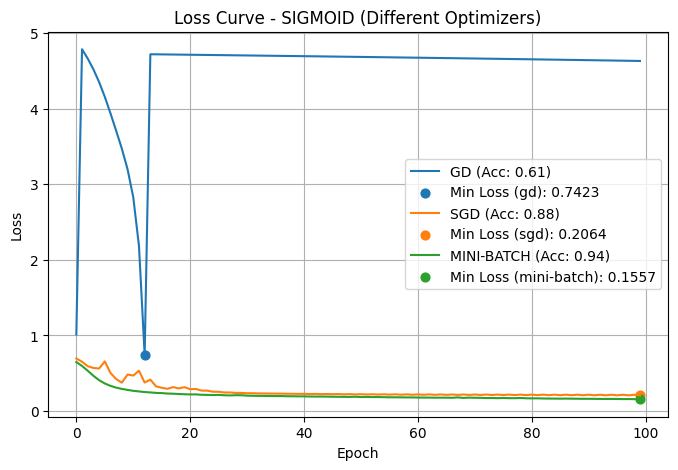

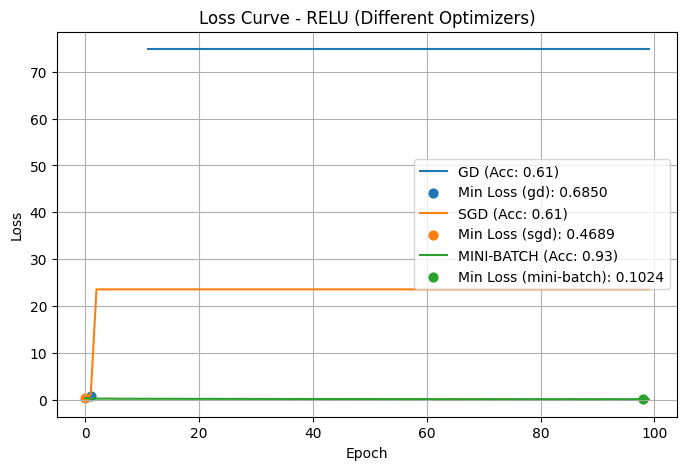

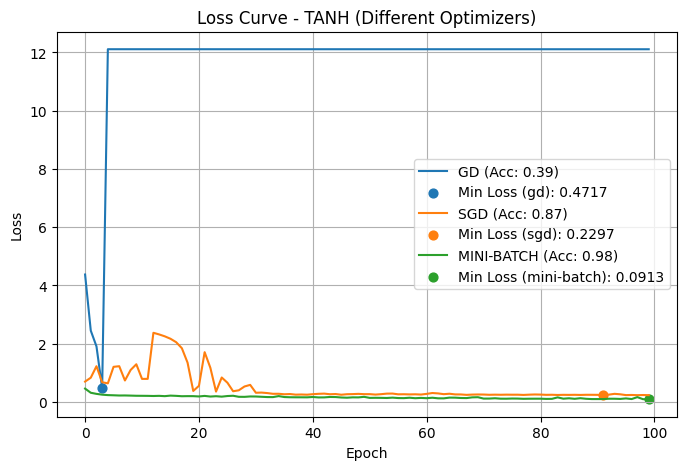

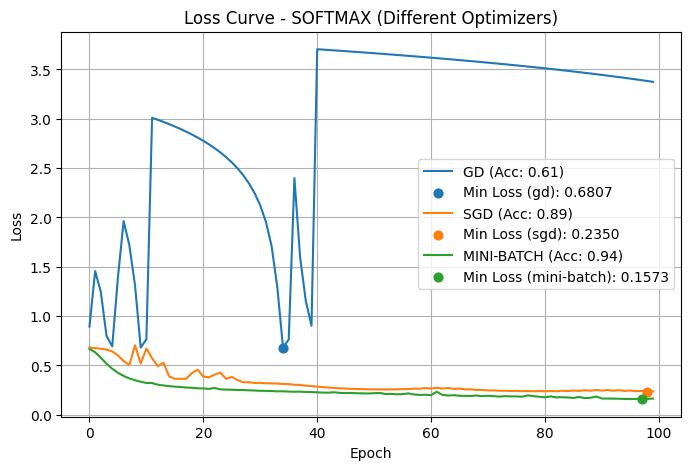

The student will fail the exam.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load and Prepare the Dataset
df = pd.read_csv('student_exam_data (2).csv')

# Define input features (study, play, sleep) and output/target (pass_in_exam)
X = df[['study', 'play', 'sleep']].values
y = df['pass_in_exam'].values.reshape(-1, 1)  # Reshape target to be a column vector

# 2. Split the Data (Train/Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define Activation Functions
def sigmoid(z): return 1 / (1 + np.exp(-z))
def dsigmoid(a): return a * (1 - a)

def relu(z): return np.maximum(0, z)
def drelu(a): return (a > 0).astype(float)

def tanh(z): return np.tanh(z)
def dtanh(a): return 1 - np.power(a, 2)

def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Improve numerical stability
    return e_z / e_z.sum(axis=1, keepdims=True)
def dsoftmax(a): return a * (1 - a)

activations = {
    "sigmoid": (sigmoid, dsigmoid),
    "relu": (relu, drelu),
    "tanh": (tanh, dtanh),
    "softmax": (softmax, dsoftmax)
}

# 4. Optimizers
def gradient_descent(params, grads, lr):
    return [p - lr * g for p, g in zip(params, grads)]

def stochastic_gradient_descent(params, grads, lr):
    return [p - lr * g for p, g in zip(params, grads)]

def mini_batch_sgd(params, grads, lr):
    return [p - lr * g for p, g in zip(params, grads)]

# 5. Simple Neural Network
class SimpleANN:
    def __init__(self, input_dim, hidden_dim, activation_name, optimizer_name, lr=0.1):
        self.activation_name = activation_name
        self.optimizer_name = optimizer_name
        self.lr = lr

        # Get the activation function and its derivative
        self.act, self.dact = activations[activation_name]

        # Initialize weights and biases (small random values)
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.1
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, 1) * 0.1
        self.b2 = np.zeros((1, 1))

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = self.act(self.Z1)

        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, output):
        dA2 = output - y
        dZ2 = dA2 * dsigmoid(output)
        dW2 = self.A1.T @ dZ2
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * self.dact(self.A1)
        dW1 = X.T @ dZ1
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        return [dW1, db1, dW2, db2]

    def update(self, grads):
        params = [self.W1, self.b1, self.W2, self.b2]
        if self.optimizer_name == 'gd':
            updated = gradient_descent(params, grads, self.lr)
        elif self.optimizer_name == 'sgd':
            updated = stochastic_gradient_descent(params, grads, self.lr)
        elif self.optimizer_name == 'mini-batch':
            updated = mini_batch_sgd(params, grads, self.lr)
        self.W1, self.b1, self.W2, self.b2 = updated

    def train(self, X, y, epochs=100, batch_size=None):
        loss_list = []
        for epoch in range(epochs):
            if batch_size:
                indices = np.random.permutation(len(X))
                X, y = X[indices], y[indices]
                for i in range(0, len(X), batch_size):
                    X_batch = X[i:i+batch_size]
                    y_batch = y[i:i+batch_size]
                    output = self.forward(X_batch)
                    grads = self.backward(X_batch, y_batch, output)
                    self.update(grads)
            else:
                output = self.forward(X)
                grads = self.backward(X, y, output)
                self.update(grads)

            y_pred = self.forward(X)
            loss = np.mean(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))
            loss_list.append(loss)
        return loss_list

    def predict(self, X):
        probs = self.forward(X)
        return (probs > 0.5).astype(int)

# 6. Run Experiments
combinations = [
    ('sigmoid', 'gd', 0.1),
    ('sigmoid', 'sgd', 0.01),
    ('sigmoid', 'mini-batch', 0.01),
    ('relu', 'gd', 0.1),
    ('relu', 'sgd', 0.01),
    ('relu', 'mini-batch', 0.01),
    ('tanh', 'gd', 0.1),
    ('tanh', 'sgd', 0.01),
    ('tanh', 'mini-batch', 0.01),
    ('softmax', 'gd', 0.1),
    ('softmax', 'sgd', 0.01),
    ('softmax', 'mini-batch', 0.01)
]

grouped_results = {}

for act_name, opt_name, lr in combinations:
    print(f"Training with {act_name.upper()} + {opt_name.upper()} + LR: {lr}...")

    model = SimpleANN(input_dim=3, hidden_dim=10, activation_name=act_name, optimizer_name=opt_name, lr=lr)
    batch = 16 if opt_name == 'mini-batch' else None

    loss_curve = model.train(X_train, y_train, epochs=100, batch_size=batch)
    y_pred = model.predict(X_test)
    acc = np.mean(y_pred == y_test)

    if act_name not in grouped_results:
        grouped_results[act_name] = {}
    grouped_results[act_name][opt_name] = (loss_curve, acc)

    print(f"{act_name.upper()} + {opt_name.upper()} => Acc: {acc:.2f}, Final Loss: {loss_curve[-1]:.4f}")

# 7. Plot the Loss Curves
for act_name, opt_data in grouped_results.items():
    plt.figure(figsize=(8, 5))
    for opt_name, (losses, acc) in opt_data.items():
        plt.plot(losses, label=f"{opt_name.upper()} (Acc: {acc:.2f})")
        plt.scatter(np.argmin(losses), min(losses), label=f"Min Loss ({opt_name}): {min(losses):.4f}", s=40)

    plt.title(f"Loss Curve - {act_name.upper()} (Different Optimizers)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# 8. Prediction for a New Student
new_student_data = np.array([[9, 3, 6]])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
new_student_scaled = scaler.transform(new_student_data)

def predict_pass_or_fail(model, new_data):
    prediction = model.predict(new_data)
    return "The student will pass the exam." if prediction[0][0] == 1 else "The student will fail the exam."

act_name = 'sigmoid'
opt_name = 'gd'
lr = 0.1
model = SimpleANN(input_dim=3, hidden_dim=10, activation_name=act_name, optimizer_name=opt_name, lr=lr)
model.train(X_train_scaled, y_train, epochs=100)

prediction = predict_pass_or_fail(model, new_student_scaled)
print(prediction)
